In [1]:
import numpy as np
import random
import collections 
import matplotlib.pyplot as plt

In [2]:
#awards rewards based on winnings 
def check_win(configuration):
    wins = [[0,1,2,3],[4,5,6,7],[8,9,10,11],
            [12,13,14,15],[0,4,8,12],[1,5,9,13],
            [2,6,10,14],[3,7,11,15],[0,5,10,15],[3,6,9,12]]
    
    for i in range(10):
        if (configuration[wins[i][0]] == 1 and
            configuration[wins[i][1]] == 1 and
            configuration[wins[i][2]] == 1 and 
            configuration[wins[i][3]] == 1):
            return 1
    
    for i in range(10):
        if (configuration[wins[i][0]] == 2 and
            configuration[wins[i][1]] == 2 and
            configuration[wins[i][2]] == 2 and 
            configuration[wins[i][3]] == 2):
            return -1
    return 0  

In [3]:
#converts the board into an integer to store the values
def state_to_key(state):
    key = 0
    for i, elem in enumerate(state):
        key += int(elem * 3**(i))
    return key

In [4]:
#returns the next and reward given a state and action
def make_move(state,action,player):
    state[action]=player
    reward=check_win(state)
    return state,reward

In [5]:
#choosing an action based on e-greedy policy
def select_action(state,act_choices):
    global td_Q
    global td_Ct, used_q, not_used_q, used_eps
    epsilon = 0.1 
    n = random.uniform(0,1)
    if(n<epsilon):
        return random.choice(act_choices)
    else:
        act_chosen=-1
        q_val=-1000.0
        for act in act_choices:
            if (td_Q[state][act]!=0 and td_Q[state][act]>q_val):
                q_val=td_Q[state][act]
                act_chosen=act
        if (act_chosen<0):
            act_chosen = random.choice(act_choices)
    return act_chosen

In [6]:
#trains an agent using 1 million episodes
def off_policy_td_control():
    global win_list,loss_list,tie_list,x_axis
    wins = 0 
    loss = 0 
    tie = 0 
    global td_Q
    reward_list = []
    for i in range(1000001):  
        state = np.zeros(16)
        action_choices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
        player=random.choice([0,1])
        reward=0
        reward_list.append(reward)
        while(reward==0 and len(action_choices)>0):
            state_key=state_to_key(state)
            action = select_action(state_key,action_choices)
            action_choices.remove(action)   
            player=player%2+1
            new_state,reward=make_move(state,action,player)
            new_state_key=state_to_key(new_state)
            alpha=0.01
            td_Q[state_key][action] += alpha * (reward + np.max(td_Q[new_state_key]) - td_Q[state_key][action])
            state=new_state
            
        if (reward==1):
            wins+=1
        elif (reward==-1):
            loss+=1
        else:
            tie+=1
            
        if (i>0 and (i%100000==0 or i==50000 or i==20000 or i==10000 or i==5000)):
            print("After ",i," episodes: ")
            total=wins+loss+tie
            win_pct=round(100*wins/total,2)
            loss_pct=round(100*loss/total,2)
            tie_pct=round(100*tie/total,2)
            if total>0:
                x_axis.append(i)
                win_list.append(win_pct)
                loss_list.append(loss_pct)
                tie_list.append(tie_pct)
            print("   wins: ",win_pct,"; loss: ", loss_pct,"; tie: ",tie_pct)
            wins = 0 
            loss = 0 
            tie = 0 
    
    return td_Q

In [7]:
td_Q = np.zeros([3**16,16])
win_list=[]
loss_list=[]
tie_list=[]
x_axis=[]
off_policy_td_control()

After  5000  episodes: 
   wins:  29.93 ; loss:  27.75 ; tie:  42.31
After  10000  episodes: 
   wins:  29.5 ; loss:  29.34 ; tie:  41.16
After  20000  episodes: 
   wins:  28.64 ; loss:  28.51 ; tie:  42.85
After  50000  episodes: 
   wins:  58.43 ; loss:  16.23 ; tie:  25.33
After  100000  episodes: 
   wins:  76.42 ; loss:  8.9 ; tie:  14.68
After  200000  episodes: 
   wins:  83.0 ; loss:  6.89 ; tie:  10.11
After  300000  episodes: 
   wins:  85.39 ; loss:  6.22 ; tie:  8.39
After  400000  episodes: 
   wins:  84.75 ; loss:  7.86 ; tie:  7.38
After  500000  episodes: 
   wins:  85.92 ; loss:  7.36 ; tie:  6.71
After  600000  episodes: 
   wins:  84.8 ; loss:  7.39 ; tie:  7.81
After  700000  episodes: 
   wins:  85.9 ; loss:  6.5 ; tie:  7.61
After  800000  episodes: 
   wins:  88.23 ; loss:  5.5 ; tie:  6.27
After  900000  episodes: 
   wins:  89.6 ; loss:  4.92 ; tie:  5.48
After  1000000  episodes: 
   wins:  88.9 ; loss:  5.15 ; tie:  5.95


array([[6.80440481e-01, 9.88784908e-01, 8.51264100e-01, ...,
        7.54141866e-01, 9.54623800e-01, 8.09222937e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.44666596e-04, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 7.20910209e-04],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

[29.93, 29.5, 28.64, 58.43, 76.42, 83.0, 85.39, 84.75, 85.92, 84.8, 85.9, 88.23, 89.6, 88.9]
[27.75, 29.34, 28.51, 16.23, 8.9, 6.89, 6.22, 7.86, 7.36, 7.39, 6.5, 5.5, 4.92, 5.15]
[42.31, 41.16, 42.85, 25.33, 14.68, 10.11, 8.39, 7.38, 6.71, 7.81, 7.61, 6.27, 5.48, 5.95]
[5000, 10000, 20000, 50000, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000]


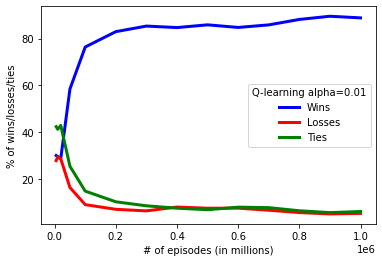

In [8]:
print(win_list)
print(loss_list)
print(tie_list)
print(x_axis)
plt.plot(x_axis,win_list,color='blue',linewidth=3,label='Wins')
plt.plot(x_axis,loss_list,color='red',linewidth=3,label='Losses')
plt.plot(x_axis,tie_list,color='green',linewidth=3,label='Ties')
plt.legend(title='Q-learning alpha=0.01')
plt.xlabel("# of episodes (in millions)")
plt.ylabel("% of wins/losses/ties")
plt.show()